In [147]:
import tensorflow as tf
from tensorflow import keras

In [148]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load and prepare training data

Get Calinfornia Housing data and split into train, test and validation sets.

In [174]:
housing = fetch_california_housing()

# test_size is default to 0.25
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [175]:
X_train_full.shape, X_train.shape, X_valid.shape, X_test.shape

((15480, 8), (11610, 8), (3870, 8), (5160, 8))

## Apply scaling

In [176]:
X_train = StandardScaler().fit_transform(X_train)
X_valid = StandardScaler().fit_transform(X_valid)
X_test = StandardScaler().fit_transform(X_test)

In [177]:
print(housing['feature_names'], housing['target_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['MedHouseVal']


In [184]:
#tf.keras.backend.clear_session()
#tf.random.set_seed(1234)

model = tf.keras.Sequential([
        tf.keras.layers.Dense(30, input_shape = X_train.shape[1:], activation = 'relu'), # just using shape from training set
        tf.keras.layers.Dense(30, activation = 'relu'),
        tf.keras.layers.Dense(1)
])


model.compile(loss = 'mse', optimizer = 'sgd')

In [185]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


## Using Call backs

The **fit()** methods accept **callbacks** argument that lets you specify a list of object that Keras will call at the start and end of training or epoch, or even batch. For example **ModelCheckpoint** callbask saves checkpoints of your model at regular intervals during training.

Set argument **save_best_only**, set to True if keep only the best.

Can also use **EarlyStopping** callback where traing is interrupted if there is no progress. This will save a lot of time.


### Custom Call Back

We can also create our own call back functions

In [186]:
class PrintValTrainRationCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nVal/Train: {:2f}".format(logs["val_loss"]/logs["loss"]))

In [187]:
checkpoint_cp = keras.callbacks.ModelCheckpoint("keras_cb.h5", save_best_only=True) # set save best only to True to keep best train, valid result
early_stopping_cp = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)
print_cp = PrintValTrainRationCallBack()

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                    callbacks = [checkpoint_cp, early_stopping_cp, print_cp],
                    epochs = 30, verbose = True)

Epoch 1/30
327/363 [==========================>...] - ETA: 0s - loss: 0.9404
Val/Train: 0.603924
363/363 [==============================] - 0s 1ms/step - loss: 0.9030 - val_loss: 0.5453
Epoch 2/30
321/363 [=========================>....] - ETA: 0s - loss: 0.4594
Val/Train: 1.053174
363/363 [==============================] - 0s 847us/step - loss: 0.4632 - val_loss: 0.4879
Epoch 3/30
300/363 [=======================>......] - ETA: 0s - loss: 0.4219
Val/Train: 1.085274
363/363 [==============================] - 0s 836us/step - loss: 0.4214 - val_loss: 0.4574
Epoch 4/30
296/363 [=======================>......] - ETA: 0s - loss: 0.4122
Val/Train: 1.125106
363/363 [==============================] - 0s 700us/step - loss: 0.4040 - val_loss: 0.4545
Epoch 5/30
346/363 [===========================>..] - ETA: 0s - loss: 0.3939
Val/Train: 1.145411
363/363 [==============================] - 0s 801us/step - loss: 0.3935 - val_loss: 0.4507
Epoch 6/30
326/363 [=========================>....] - ETA: 0s 

162/162 [==============================] - 0s 531us/step - loss: 2.3253
[1.    2.201 1.153]
[[1.1315364 1.8732312 2.6149528]]


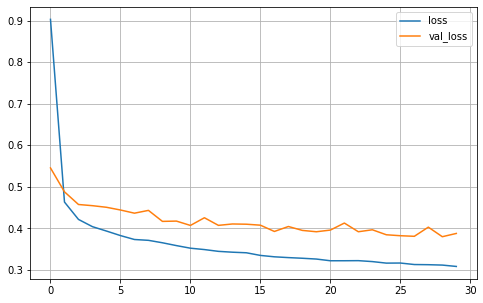

In [188]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] 
y_pred = model.predict(X_new)

print(y_test[:3])
print(y_pred.reshape(1, -1))

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()